In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Academics/Visiting Lectures/2026-H1/202601-SDP-AU/Session-11-Introduction-to-Machine-Learning')

### **Data Aquisition**

In [23]:
import pandas as pd
# Load the bank marketing data from an Excel file into a pandas DataFrame
data = pd.read_excel('Data/bank_marketing_data.xlsx')

In [24]:
# Display the number of rows and columns in the DataFrame
data.shape

(41188, 21)

In [25]:
# Display a concise summary of the DataFrame, including data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Reasoning**:
To separate the DataFrame columns into numeric and categorical lists, I will use `select_dtypes` with 'include' and 'exclude' parameters respectively.



In [26]:
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Print the identified numeric columns
print("Numeric Columns:", numeric_cols)
# Print the identified categorical columns
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [27]:
numerical_stats_list = []

# Iterate through each numeric column to calculate and store descriptive statistics
for col in numeric_cols:
    # Calculate missing values count and percentage
    missing_count = data[col].isnull().sum()
    missing_percentage = (missing_count / len(data)) * 100

    # Store various statistics for the current column
    stats = {
        'Column': col,
        'Missing Count': missing_count,
        'Missing Percentage': f'{missing_percentage:.2f}%',
        'Minimum Value': data[col].min(),
        '5th Percentile': data[col].quantile(0.05),
        '10th Percentile': data[col].quantile(0.10),
        '25th Percentile': data[col].quantile(0.25),
        'Median (50th Percentile)': data[col].median(),
        'Mean': data[col].mean(),
        '75th Percentile': data[col].quantile(0.75),
        '90th Percentile': data[col].quantile(0.90),
        '95th Percentile': data[col].quantile(0.95),
        'Maximum Value': data[col].max()
    }
    numerical_stats_list.append(stats)

# Convert the list of statistics dictionaries into a DataFrame
numerical_stats_df = pd.DataFrame(numerical_stats_list)

print("Numerical Statistics Report:")
# Display the DataFrame containing numerical statistics
display(numerical_stats_df)

Numerical Statistics Report:


,Column,Missing Count,Missing Percentage,Minimum Value,5th Percentile,10th Percentile,25th Percentile,Median (50th Percentile),Mean,75th Percentile,90th Percentile,95th Percentile,Maximum Value
0,age,0,0.00%,17.000,26.000,28.000,32.000,38.000,40.024060,47.000,55.000,58.000,98.000
1,duration,0,0.00%,0.000,36.000,59.000,102.000,180.000,258.285010,319.000,551.000,752.650,4918.000
2,campaign,0,0.00%,1.000,1.000,1.000,1.000,2.000,2.567593,3.000,5.000,7.000,56.000
3,pdays,0,0.00%,0.000,999.000,999.000,999.000,999.000,962.475454,999.000,999.000,999.000,999.000
4,previous,0,0.00%,0.000,0.000,0.000,0.000,0.000,0.172963,0.000,1.000,1.000,7.000
5,emp.var.rate,0,0.00%,-3.400,-2.900,-1.800,-1.800,1.100,0.081886,1.400,1.400,1.400,1.400
6,cons.price.idx,0,0.00%,92.201,92.713,92.893,93.075,93.749,93.575664,93.994,94.465,94.465,94.767
7,cons.conf.idx,0,0.00%,-50.800,-47.100,-46.200,-42.700,-41.800,-40.502600,-36.400,-36.100,-33.600,-26.900
8,euribor3m,0,0.00%,0.634,0.797,1.046,1.344,4.857,3.621291,4.961,4.964,4.966,5.045
9,nr.employed,0,0.00%,4963.600,5017.500,5076.200,5099.100,5191.000,5167.035911,5228.100,5228.100,5228.100,5228.100


## **Exploratory Data Analysis**

### **1. Check Dependent variable class imbalance**

### **2. Univariate Data Analysis**
1. Numbers
2. Visuals
3. Evidence Testing

### **3. Bi-variate Data Analysis**
1. Numbers
2. Visuals
3. Evidence Testing

### **1. Check Dependent variable class imbalance**

In [28]:
# Calculate the counts of each unique value in the 'y' column
y_counts = data['y'].value_counts()
# Calculate the percentage of each unique value in the 'y' column
y_percentages = data['y'].value_counts(normalize=True) * 100

# Create a DataFrame to display the frequency and percentage of the dependent variable 'y'
y_freq_df = pd.DataFrame({
    'Count': y_counts,
    'Percentage': y_percentages.map('{:.2f}%'.format)
})

print("Frequency Table for Dependent Variable 'y':")
# Display the frequency table
display(y_freq_df)

Frequency Table for Dependent Variable 'y':


,Count,Percentage
y,,
no,36548,88.73%
yes,4640,11.27%


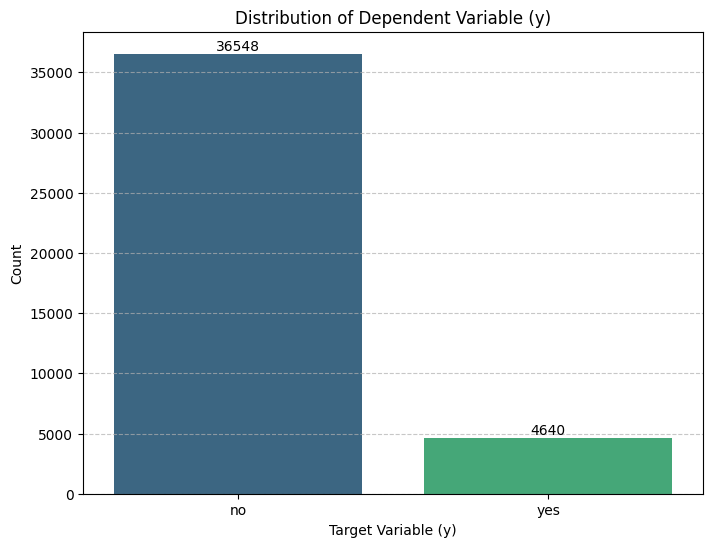

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
# Create a countplot to visualize the distribution of the dependent variable 'y'
sns.countplot(x='y', data=data, palette='viridis')
plt.title('Distribution of Dependent Variable (y)')
plt.xlabel('Target Variable (y)')
plt.ylabel('Count')

# Add count labels to the bars for better readability
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.0f')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

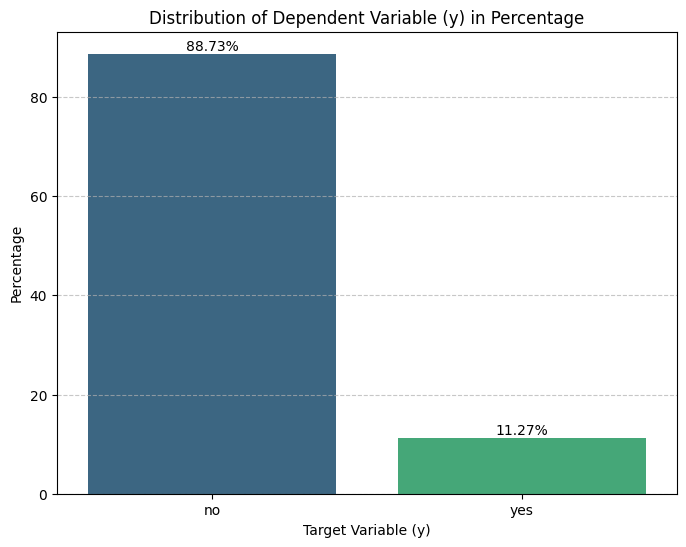

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate percentages of the dependent variable 'y'
y_percentages = data['y'].value_counts(normalize=True) * 100
# Create a DataFrame for plotting percentages
y_plot_data = pd.DataFrame({
    'Target Variable (y)': y_percentages.index,
    'Percentage': y_percentages.values
})

plt.figure(figsize=(8, 6))
# Create a bar plot to visualize the distribution of 'y' in percentages
sns.barplot(x='Target Variable (y)', y='Percentage', data=y_plot_data, palette='viridis')
plt.title('Distribution of Dependent Variable (y) in Percentage')
plt.xlabel('Target Variable (y)')
plt.ylabel('Percentage')

# Add percentage labels to the bars
for index, row in y_plot_data.iterrows():
    plt.text(index, row['Percentage'], f'{row['Percentage']:.2f}%', color='black', ha="center", va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Univariate Analysis of Age Feature**

In [31]:
# Calculate descriptive statistics for the 'age' column
age_stats = data['age'].describe()
# Calculate median, variance, skewness, and kurtosis for 'age'
median_age = data['age'].median()
variance_age = data['age'].var()
skewness_age = data['age'].skew()
kurtosis_age = data['age'].kurt()

display("Descriptive Statistics for Age:")
display('-----------------------------------------------------------')
# Display the standard descriptive statistics
display(age_stats)
# Display additional calculated statistics
display(f"Median: {median_age:.2f}")
display(f"Variance: {variance_age:.2f}")
display(f"Skewness: {skewness_age:.2f}")
display(f"Kurtosis: {kurtosis_age:.2f}")

'Descriptive Statistics for Age:'

'-----------------------------------------------------------'

,age
count,41188.00000
mean,40.02406
std,10.42125
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


'Median: 38.00'

'Variance: 108.60'

'Skewness: 0.78'

'Kurtosis: 0.79'

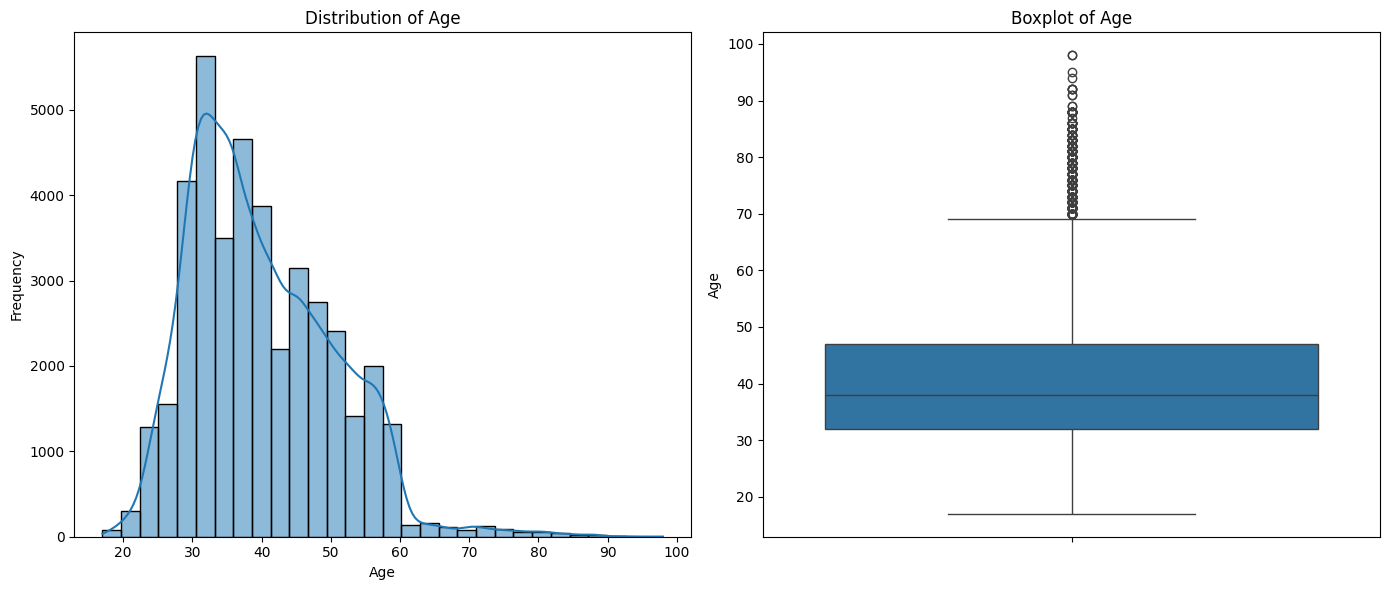

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots for age distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for 'age' distribution
sns.histplot(data['age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Boxplot for 'age' to visualize spread and outliers
sns.boxplot(y=data['age'], ax=axes[1])
axes[1].set_title('Boxplot of Age')
axes[1].set_ylabel('Age')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

### **Univariate analysis of Education Feature**

In [33]:
# Calculate the counts of each unique education level
education_counts = data['education'].value_counts()
# Calculate the percentage of each unique education level
education_percentages = data['education'].value_counts(normalize=True) * 100

# Create a DataFrame to display the frequency and percentage of education levels
education_freq_df = pd.DataFrame({
    'Count': education_counts,
    'Percentage': education_percentages.map('{:.2f}%'.format)
})

print("Frequency Table for Education:")
# Display the frequency table
display(education_freq_df)

Frequency Table for Education:


,Count,Percentage
education,,
university.degree,12168,29.54%
high.school,9515,23.10%
basic.9y,6045,14.68%
professional.course,5243,12.73%
basic.4y,4176,10.14%
basic.6y,2292,5.56%
unknown,1731,4.20%
illiterate,18,0.04%


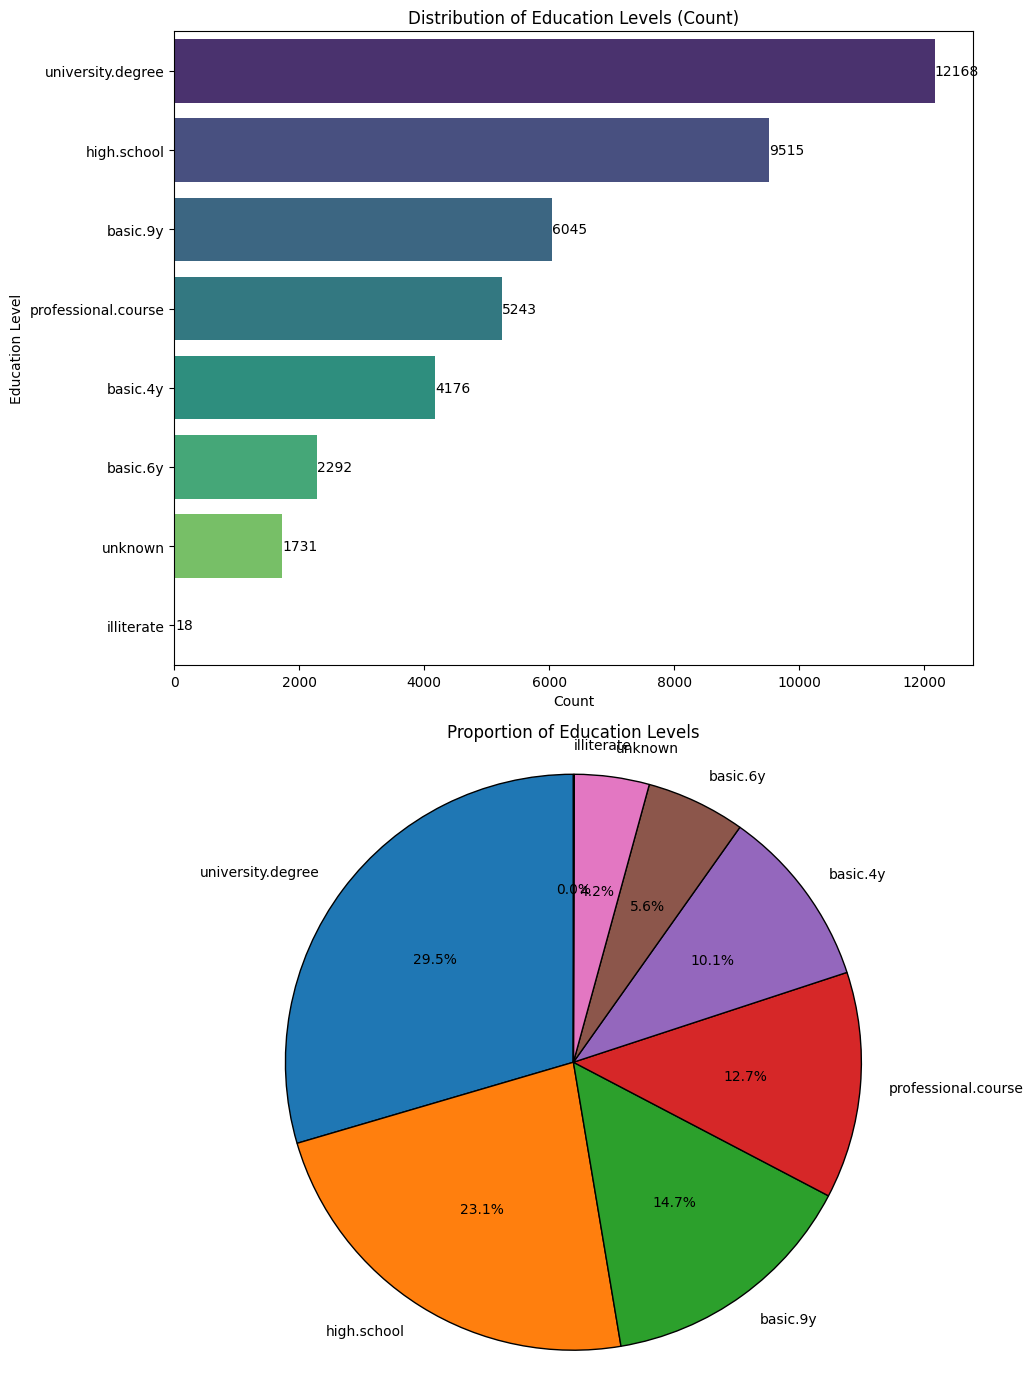

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots, stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(10, 14)) # Adjust figsize for vertical layout

# Bar Chart for 'education' counts in the first subplot
sns.countplot(y=data['education'], order=data['education'].value_counts().index, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Education Levels (Count)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Education Level')

# Add count labels to the bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f')

# Pie Chart for 'education' proportions in the second subplot
education_counts = data['education'].value_counts()
axes[1].pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Proportion of Education Levels')
axes[1].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout and display plots
plt.tight_layout()
plt.show()

### **Bi-variate Analysis of Age Feature with dependent variable "y"**

In [35]:
age_stats_by_y_list = []

# Group the data by the target variable 'y' and calculate age statistics for each group
for group_name, group_data in data.groupby('y'):
    age_series = group_data['age']

    # Calculate missing values count and percentage for 'age' within each group
    missing_count = age_series.isnull().sum()
    missing_percentage = (missing_count / len(age_series)) * 100 if len(age_series) > 0 else 0

    # Store various age statistics for the current 'y' group
    stats = {
        'Target Variable (y)': group_name,
        'Missing Count': missing_count,
        'Missing Percentage': f'{missing_percentage:.2f}%',
        'Minimum Value': age_series.min(),
        '5th Percentile': age_series.quantile(0.05),
        '10th Percentile': age_series.quantile(0.10),
        '25th Percentile': age_series.quantile(0.25),
        'Median (50th Percentile)': age_series.median(),
        'Mean': age_series.mean(),
        '75th Percentile': age_series.quantile(0.75),
        '90th Percentile': age_series.quantile(0.90),
        '95th Percentile': age_series.quantile(0.95),
        'Maximum Value': age_series.max()
    }
    age_stats_by_y_list.append(stats)

# Convert the list of statistics dictionaries into a DataFrame
age_stats_by_y = pd.DataFrame(age_stats_by_y_list)

print("Age Statistics Grouped by 'y':")
# Display the DataFrame containing age statistics by 'y' group
display(age_stats_by_y)

Age Statistics Grouped by 'y':


,Target Variable (y),Missing Count,Missing Percentage,Minimum Value,5th Percentile,10th Percentile,25th Percentile,Median (50th Percentile),Mean,75th Percentile,90th Percentile,95th Percentile,Maximum Value
0,no,0,0.00%,17,26.0,29.0,32.0,38.0,39.911185,47.0,54.0,57.0,95
1,yes,0,0.00%,17,24.0,26.0,31.0,37.0,40.913147,50.0,60.0,69.0,98


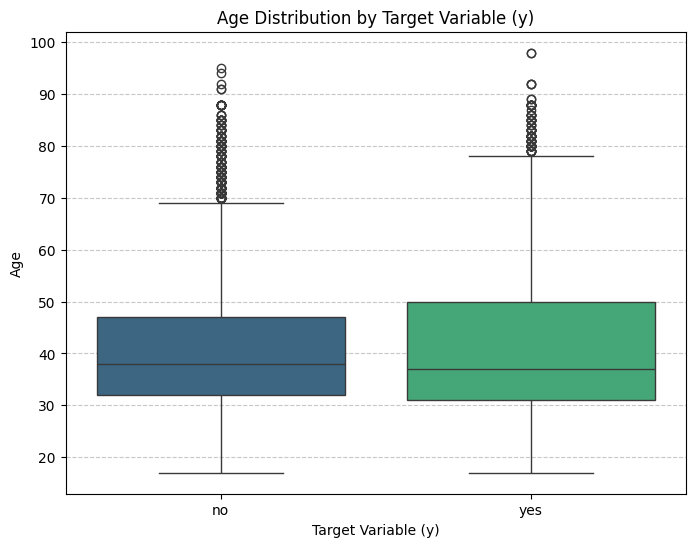

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
# Create a boxplot to visualize the distribution of 'age' across different 'y' groups
sns.boxplot(x='y', y='age', data=data, palette='viridis')
plt.title('Age Distribution by Target Variable (y)')
plt.xlabel('Target Variable (y)')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [37]:
from scipy.stats import ttest_ind

# Separate 'age' into two groups based on the target variable 'y'
age_yes = data[data['y'] == 'yes']['age']
age_no = data[data['y'] == 'no']['age']

# Perform an independent samples T-test (Welch's T-test) to compare the means of 'age' between the two groups.
# equal_var=False is used for Welch's T-test, which does not assume equal population variances.
t_statistic, p_value = ttest_ind(age_yes, age_no, equal_var=False)

# Display the results of the T-test
print(f"Independent Samples T-test (Welch's) for Age between 'y' groups:")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print("Note: Degrees of freedom for Welch's T-test are calculated internally by scipy and not directly returned. The p-value is adjusted accordingly.")

Independent Samples T-test (Welch's) for Age between 'y' groups:
T-statistic: 4.7795
P-value: 0.0000
Note: Degrees of freedom for Welch's T-test are calculated internally by scipy and not directly returned. The p-value is adjusted accordingly.


In [38]:
# Calculate the mean and standard deviation of 'age' for the 'yes' group
mean_age_yes = age_yes.mean()
std_age_yes = age_yes.std()

# Calculate the mean and standard deviation of 'age' for the 'no' group
mean_age_no = age_no.mean()
std_age_no = age_no.std()

# Print the calculated statistics
print(f"Mean age for 'yes' group: {mean_age_yes:.2f}")
print(f"Standard deviation for 'yes' group: {std_age_yes:.2f}")
print(f"Mean age for 'no' group: {mean_age_no:.2f}")
print(f"Standard deviation for 'no' group: {std_age_no:.2f}")

Mean age for 'yes' group: 40.91
Standard deviation for 'yes' group: 13.84
Mean age for 'no' group: 39.91
Standard deviation for 'no' group: 9.90


### **Bi-variate Analysis of Education Feature with dependent variable "y"**

In [39]:
# Create a cross-tabulation (contingency table) of 'education' and 'y'
education_y_crosstab = pd.crosstab(data['education'], data['y'])

# Add a 'Total' column to see the overall counts for each education level
education_y_crosstab['Total'] = education_y_crosstab['no'] + education_y_crosstab['yes']

# Sort the DataFrame by the 'Total' column in descending order for better overview
education_y_crosstab = education_y_crosstab.sort_values(by='Total', ascending=False)

print("Cross-Tabulation of Education by Target Variable (y) with Totals (Sorted):")
# Display the cross-tabulation table
display(education_y_crosstab)

Cross-Tabulation of Education by Target Variable (y) with Totals (Sorted):


y,no,yes,Total
education,,,
university.degree,10498,1670,12168
high.school,8484,1031,9515
basic.9y,5572,473,6045
professional.course,4648,595,5243
basic.4y,3748,428,4176
basic.6y,2104,188,2292
unknown,1480,251,1731
illiterate,14,4,18


In [40]:
# Create a percentage cross-tabulation of 'education' by 'y', normalized by columns
education_y_crosstab_pct = pd.crosstab(data['education'], data['y'], normalize='columns') * 100

# Get overall percentages of education levels in the entire dataset
education_overall_pct = data['education'].value_counts(normalize=True) * 100

# Join the column-normalized percentages with the overall education percentages
percentage_report = education_y_crosstab_pct.join(education_overall_pct.rename('Overall %'))

# Sort the report by the 'yes' column in descending order to highlight categories with higher 'yes' rates
percentage_report_sorted = percentage_report.sort_values(by='yes', ascending=False)

print("Percentage Cross-Tabulation of Education by Target Variable (y) with Overall Percentage (Sorted by 'yes' column):")
# Display the sorted percentage report, formatted to two decimal places with a '%' sign
display(percentage_report_sorted.applymap(lambda x: f'{x:.2f}%'))

Percentage Cross-Tabulation of Education by Target Variable (y) with Overall Percentage (Sorted by 'yes' column):


,no,yes,Overall %
education,,,
university.degree,28.72%,35.99%,29.54%
high.school,23.21%,22.22%,23.10%
professional.course,12.72%,12.82%,12.73%
basic.9y,15.25%,10.19%,14.68%
basic.4y,10.26%,9.22%,10.14%
unknown,4.05%,5.41%,4.20%
basic.6y,5.76%,4.05%,5.56%
illiterate,0.04%,0.09%,0.04%


In [41]:
from scipy.stats import chi2_contingency

# Use the previously created contingency table for 'education' and 'y'
# The chi2_contingency function expects only the observed frequencies, so ensure no 'Total' columns are included.
contingency_table = pd.crosstab(data['education'], data['y'])

# Perform the Chi-square test of independence
# Returns: chi2 (the test statistic), p_value, dof (degrees of freedom), expected (expected frequencies table)
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Test of Independence between Education and Target Variable (y):")
print(f"Chi-square Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

# Optional: Uncomment the following lines to display expected frequencies for interpretation
# print("Expected Frequencies (if no association):")
# display(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

Chi-square Test of Independence between Education and Target Variable (y):
Chi-square Statistic: 193.1059
P-value: 0.0000
Degrees of Freedom: 7


## **Assumptions of the Chi-square Test**

The Chi-square test of independence relies on several key assumptions to ensure the validity of its results:

1.  **Independence of Observations:**
    *   **What it means:** Each observation (individual or case) included in the calculation of the contingency table must be independent of all other observations. This means that the outcome of one observation should not influence the outcome of another.
    *   **Violation:** If observations are not independent (e.g., repeated measurements from the same individuals, or samples that are related), the test can lead to inflated Chi-square statistics and artificially small p-values, increasing the chance of a Type I error.

2.  **Expected Frequencies:**
    *   **What it means:** The Chi-square test compares observed frequencies with expected frequencies. It is crucial that the expected frequencies are not too small. A common rule of thumb is that:
        *   No more than 20% of the cells should have an expected frequency less than 5.
        *   No cell should have an expected frequency less than 1.
    *   **Violation:** If expected frequencies are too low, the Chi-square approximation to the sampling distribution becomes inaccurate, leading to unreliable p-values. In such cases, alternatives like Fisher's Exact Test (especially for 2x2 tables) or combining categories might be necessary.

3.  **Categorical Data:**
    *   **What it means:** The variables being analyzed must be categorical (nominal or ordinal). The Chi-square test is designed for frequency counts within categories.
    *   **Violation:** Using continuous or quantitative data directly in a Chi-square test (without categorizing it first) is inappropriate and will yield meaningless results.

4.  **Random Sampling:**
    *   **What it means:** The data should be obtained from a simple random sample from the population of interest. This ensures that the sample is representative of the population and allows for the generalization of findings.
    *   **Violation:** Non-random sampling methods can introduce bias, making the sample not representative, and thus the conclusions drawn from the Chi-square test may not be generalizable to the population.

5.  **Mutually Exclusive Categories:**
    *   **What it means:** Each observation must fall into one and only one category for each variable. Categories should not overlap.
    *   **Violation:** If categories are not mutually exclusive, the frequency counts will be inaccurate, invalidating the test.

Understanding these assumptions is vital for correctly interpreting the results of a Chi-square test and for deciding if it's the appropriate statistical test for your data.